To close out this lesson, you're going to do three exercises. For the first exercise, you'll write up a short answer to a question. For the second and third exercises, you'll do your work in Jupyter Notebooks.

1. Interpretation and significance
Suppose that you would like to know how much families in the US are spending on recreation annually. Use the following estimated model:

𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒 = 873 + 0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒 + 0.000002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒² − 223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠
Here, expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics can be given in order to ensure that your interpretations make sense statistically? Write up your answer.

The model is:

The necessary thing that is not given in the question is the statistical significancy of the coefficients. Although the coefficients appear different from zero, if they are statistically insignificant, we should consider them as zero. So, t statistics or the associated p-values should be provided.

Assuming that all the estimated coefficients are statistically significant, we can interpret the model as follows: The bias term is 873. Interpreting it is difficult because of the reasons we mentioned in the checkpoint. So, we just say that it is the bias term. On average, the families with children spend $223.57 less on recreation than the families without a child. The relation between the recreation expenditure and the income is quadratic. An increase of $1000 in annual income will not only increase the recreation expenditure by $1.2 but also an additional 0.002 X annual income. This second piece comes from the relation between the recreation expenditure and the square of the annual income. Notice that we expressed this second part as 0.002 X annual income. This is because of the fact that the exact value depends on the level of income! Since the relationship is quadratic, the magnitude of the second term increases as the level of X increases. The graph below demonstrates the relation between the annual reacreation expenditure and the annual income seperately for the families with children and without children.

Answer: An estimated coefficient is the measure of the relationship between that feature and the target, after stripping out the effects of all other features.

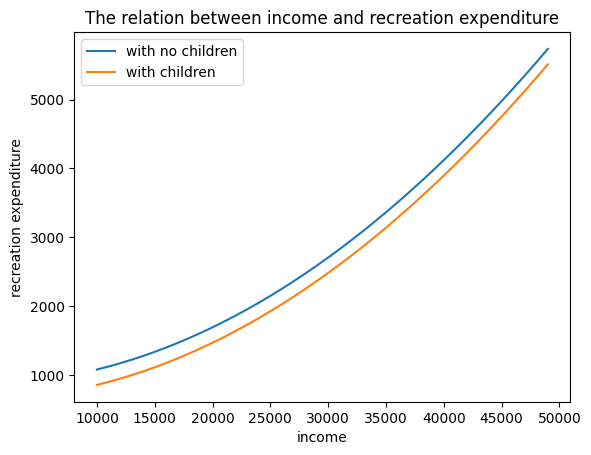

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# X represents annual income
X = np.arange(10000, 50000, 1000)
# Y represents annual expenditure on recreation
# for families with no children
Y = 873 + 0.0012*X + 0.000002*(X**2)
# Y_kids represents annual expenditure on recreation
# for families with children
Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="with no children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure")
plt.legend()
plt.show()

2. Weather model
In this exercise, you'll work with the historical temperature data from the previous lesson. To complete this exercise, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

First, load the dataset from the weatherinszeged table from Thinkful's database.
Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine, text

# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

insurance_df = pd.read_sql_query(text('SELECT * FROM weatherinszeged'), con=engine.connect())

# No need for an open connection, because you're only doing a single query
engine.dispose()

insurance_df.head(10)


,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [3]:
# `Y` is the target variable
Y = insurance_df['apparenttemperature'] - insurance_df['temperature']
# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X = insurance_df[['humidity','windspeed']]

# Create a `LinearRegression` model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.02918594 -0.11929075]

Intercept: 
 2.438105415187703


In [4]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:27:59   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Are the estimated coefficients statistically significant?
**Since the pvalue is [0.000] ie. less than or equal to 0.05 , it suggests a significant relationship with the target variable.**

Are the signs of the estimated coefficients in line with your previous expectations?
**The coefficients have not changed with respect to the previous model**

We can expect that as humidity increases the difference between the apparent temperature and the temperature also increases. However, according to our estimations the sign of the coefficient of the humidity is negative. We may also expect that the difference of the apparent tempereture and the temperature negatively related with the wind speed as our estimation says so.
According to the estimated model, 1 point increase in the humidity results in 3.03 points decrease in the target. 1 point increase in the windspeed is associated with 0.12 point decrease in our target.


Coefficients: 
 [2. 3.]

Intercept: 
 0.9999999997671694


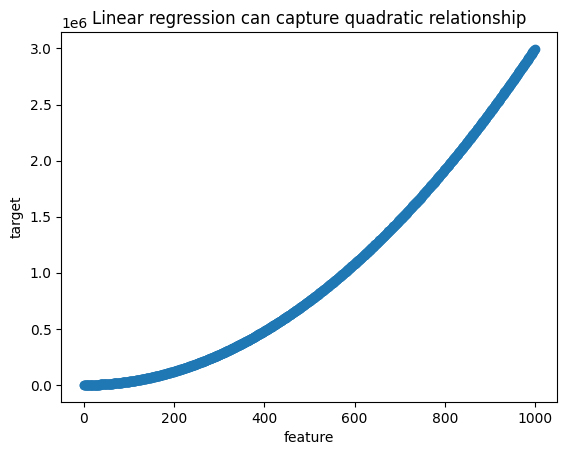

In [5]:
############# relationship between target and explanatory variables ###########

df = pd.DataFrame()

# Data from 0-999
df["X"] = np.arange(0,1000,1)
# Take the square of X
df["X_sq"] = df["X"]**2

# This is your equation: Y = 1 + 2*X + 3*X^2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]

# Fit a linear regression where target is `Y`
# and features are `X` and `X^2`
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X","X_sq"]],df["Y"])

# Predictions of the linear regression
predictions = lrm_example.predict(df[["X","X_sq"]])

# Print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# Plot the estimated `Y` and `X`
# The relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

In [6]:
############## Including humidity and windspeed ##############
# `Y` is the target variable
Y1 = insurance_df['apparenttemperature'] - insurance_df['temperature']

# This is the interaction between BMI and smoking
insurance_df["humi_wind_speed"] = insurance_df.humidity * insurance_df.windspeed

# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X1 = insurance_df[['humidity','windspeed', 'humi_wind_speed']]

# Create a `LinearRegression` model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# Fit method estimates the coefficients using OLS
lrm.fit(X1, Y1)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 0.17751219  0.09048213 -0.29711946]

Intercept: 
 0.08393631009782809


In [8]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X1 = sm.add_constant(X1)

results = sm.OLS(Y1, X1).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:36:47   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0839      0.033      2.511      0.012       0.018       0.149
humidity            0.1775      0.043      4.133      0.000       0.093       0.262
windspeed           0.0905      0.002     36.797      0.000       0.086       0.095
humi_wind_speed    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Coefficients: 
 [2. 3.]

Intercept: 
 0.9999999997671694


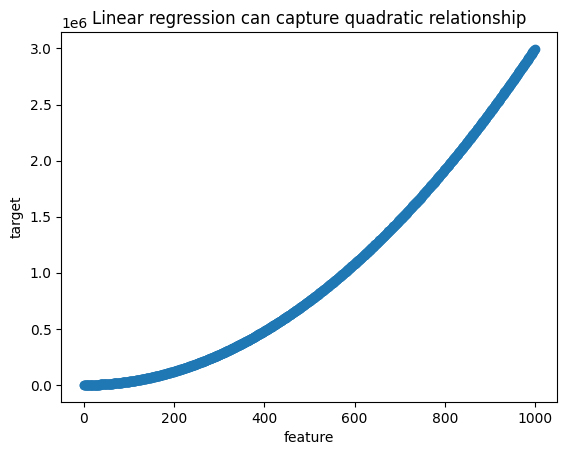

In [9]:
############# relationship between target and explanatory variables ###########

df = pd.DataFrame()

# Data from 0-999
df["X1"] = np.arange(0,1000,1)
# Take the square of X
df["X1_sq"] = df["X1"]**2

# This is your equation: Y = 1 + 2*X + 3*X^2
df["Y1"] = 1 + 2*df["X1"] + 3*df["X1_sq"]

# Fit a linear regression where target is `Y`
# and features are `X` and `X^2`
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X1","X1_sq"]],df["Y1"])

# Predictions of the linear regression
predictions = lrm_example.predict(df[["X1","X1_sq"]])

# Print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# Plot the estimated `Y` and `X`
# The relationship should be quadratic
plt.scatter(df["X1"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

Are the coefficients statistically significant? yes, because teh p value is now 0.012 for const [ie. less than 0.05]

Did the signs of the estimated coefficients for humidity and windspeed change? yes it changed

Similar to the previous model, all of the coefficients are statistically significant as their p-values are less than 0.05.
Signs of the both humidity and windspeed changed from negative to the positive when we include the intereaction term.
According to the model, 1 point increase in the humidity and windspeed results in 0.18 and 0.09 point increases in the target respectively.
According to the model, the coefficient of the interaction term is -0.30. We can interpret it as follows. Given a windspeed level, 1 point increase in humidity results in 0.18 - 0.30 X windspeed point increase in the target. This means that the increase in the target is lower for high values of windspeed than for low values of windspeed. So, the windspeed mitigates the effect of humidity increase on the target. Similarly for a given humidity level, 1 point increase in the windspeed results in 0.09 - 0.30 X humidity point increase in the target. So, the humidity also mitigates the effect of windspeed on the target.

**3. House prices model**
In this exercise, you'll interpret your house prices model. To complete this exercise, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
Now, exclude the insignificant features from your model. Did anything change?
Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [13]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [14]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#insurance_df = pd.read_sql_query('select * from medicalcosts',con=engine)

house_prices_df = pd.DataFrame(engine.connect().execute(text('select * from houseprices')))

# No need for an open connection, because you're only doing a single query
engine.dispose()

insurance_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [15]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [16]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:51:42   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistically significant variables are overallqual, grlivarea, garagecars, totalbsmtsf, mszoning_FV and mszoning_RL. All the other variables are statistically insignificant and hence their coefficients are statistically zero. According to the estimation results:

1 point increase in overallqual results in $23330 increase in sale price.
1 point increase in grlivarea results in $45.6344 increase in sale price.
1 point increase in garagecars results in $13450 increase in sale price.
1 point increase in totalbsmtsf results in $28.3816 increase in sale price.
Average sale price is higher in mszoning_FV and mszoning_RL than the base zone by 25090 and 28570 respectively. So, the average house price is the highest in mszoning_RL.
Now let's exclude statistically insignificant variables from the model and re-estimate it:

In [17]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     803.3
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:52:23   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.087e+05   4792.537    -22.674      0.000   -1.18e+05   -9.93e+04
overallqual  2.332e+04   1078.278     21.628      0.000    2.12e+04    2.54e+04
grlivarea      45.9659      2.452     18.743      0.000      41.155      50.777
garagecars   1.721e+04   1732.720      9.931      0.000    1.38e+04    2.06e+04
totalbsmtsf    29.3276      2.858     10.261      0.000      23.721      34.934
mszoning_FV  1.679e+04   5560.901      3.020      0.003    5885.005    2.77e+04
mszoning_RL  1.968e+04   2833.445      6.946      0.000    1.41e+04    2.52e+04
==============================================================================
Omnibus:                      406.420   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37605.498
Skew:                          -0.057   Prob(JB):                         0.00
Kurtosis:                      27.863   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results resemble the previous model's results. The estimated coefficients are close to the previous model except the dummy variables. The coefficients of the dummies changed relatively larger than the other variables.

Considering the results, the most prominent factors affecting the sale price seem to be the overallqual and the mszoning.

Keeep for future reference: https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/4.solution_understanding_the_relationship.ipynb